<a href="https://colab.research.google.com/github/brendenwest/ad450/blob/master/5_data_pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pipelines

### Reading
- https://hazelcast.com/glossary/data-pipeline/
- https://spark.apache.org/docs/latest/api/python/getting_started/index.html
- https://sparkbyexamples.com/pyspark-tutorial/#rdd
- https://spark.apache.org/docs/latest/streaming-programming-guide.html 
- https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html 

### Watch
- https://aws.amazon.com/sagemaker/data-wrangler/

### Learning Outcomes

- data pipelines defined
- batch -v- streaming pipelines
- distributed processing with PySpark
- Workflow management with Airflow & Sagemaker

# What are Data Pipelines?

A **data pipeline** is a series of data processing steps, where the output of each step is an input to the next step. 

ETL is a specific type of data pipelines that:

- **extracts** data from a source (e.g. database, data lake, 3rd party api, etc.)
- **transforms** the data for specific purpopses (e.g. analytics system)
- **loads** the data into a target destination (e.g. database). 

**Data science** pipelines may extract data from a source optimized for business purposes (e.g. accounting system), transform the data for analytics purposes, and load the data into a reporting system (e.g. dashboards)

It's common to develop an initial pipeline at small scale, perhaps using a Jupyter notebook, before **operationalizing** the pipeline in a **production** environment at full scale.

Data pipelines can be constructed from a wide variety of sources & technologies. Python-based tools are widely used for analytics and data science pipelines.


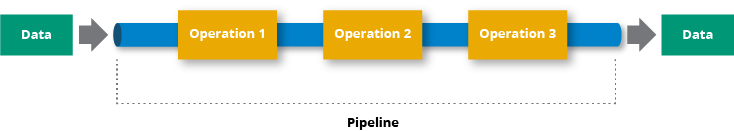

## Batch -v- Streaming

A **batch-based** data pipeline performs data operations at specific times (usually scheduled).

A **streaming** data pipeline performs data operations continuously as new source data is generated through **events**. Stream processing enables **real-time** analytics (e.g. fraud & anomoly detection). 



# What is PySpark?

Apache Spark is an open-source (Java-based) engine for performing large-scale, distributed (parallelized) data-processing & machine learning operations.

PySpark is a Spark library written in Python and compatible with Pandas. PySpark can run operations 100x faster than a traditional Python application.

Some key advantages of PySpark:
- distributed (cluster) processing
- in-memory computation
- immutable data objects
- lazy evaluation
- caching & persistence
- ANSI SQL compatibility


## PySpark Objects

**RDD (Resilient Distributed Dataset)**

A fundamental data structure of PySpark. An RDD is a fault-tolerant, immutable distributed collection of objects. 

Each dataset in an RDD is divided into logical partitions, which can be computed on different nodes of a cluster.

**SparkSession** An entrypoint to the PySpark application

**SparkContext** 

**PySpark DataFrame**

A distributed collection of data organized into named columns. Conceptually equivalent to relational database table or a Pandas dataframe, but with richer optimizations under the hood. PySpark executes DataFrames in parallel across clustered machines.

DataFrames can be constructed from a wide array of sources such as structured data files, tables in Hive, external databases, or existing RDDs.

## RDD Operations

The PySpark RDD supports two kinds of operations:

- **RDD transformations** – operations that return a new RDD. Transformations are lazy (executed only when you call an action on the RDD). Some common transformations are - flatMap(), map(), reduceByKey(), filter(), sortByKey()

- **RDD actions** – operations that trigger computation and return RDD values to the driver. Any RDD function that returns non-RDD[T] is considered as an action - for example: count(), collect(), first(), max(), reduce()



## PySpark Example

In [ ]:
# set environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
# create a SparkSession

from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


  {"title": "Northanger Abbey", "author": "Austen, Jane", "year_written": 1814, "edition": "Penguin", "price":  18.2}

In [ ]:
# install JVM
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# install Spark & Hadoop
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

# Data Workflow Management

Data pipelines can be highly custom, but a number of tools exist to simplify their management. A few of note are:

- Airflow - Python-based open-source platform to programmatically author, schedule and monitor workflows as as Directed Acyclic Graphs (DAGs) of tasks. Tasks are executed on distributed workers.


- AWS SageMaker Data Wrangler - Amazon service optimized for automated machine-learning workflows
